<a href="https://colab.research.google.com/github/charaf19/Tensorflow/blob/main/Feedforward_NN_colab_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler

In [58]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/diabetes.csv")

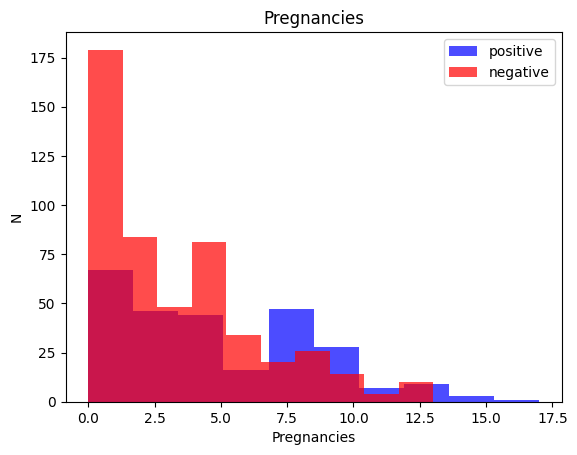

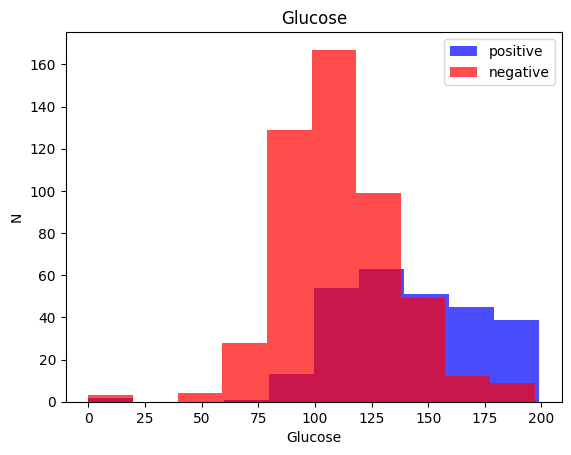

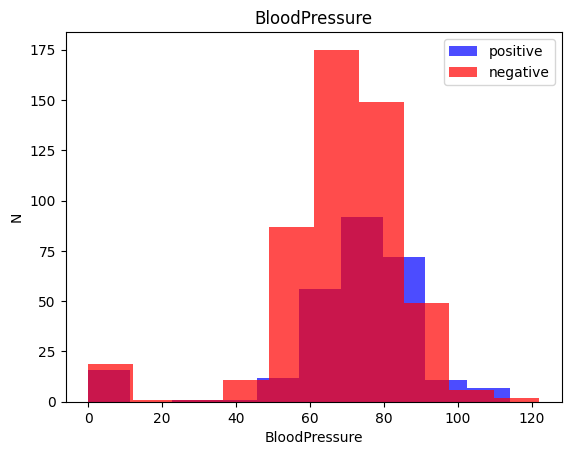

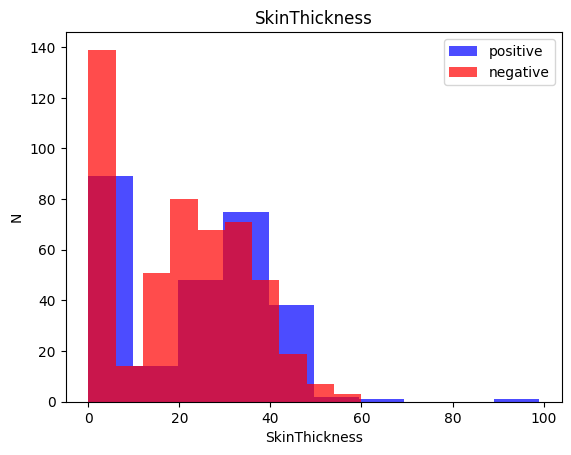

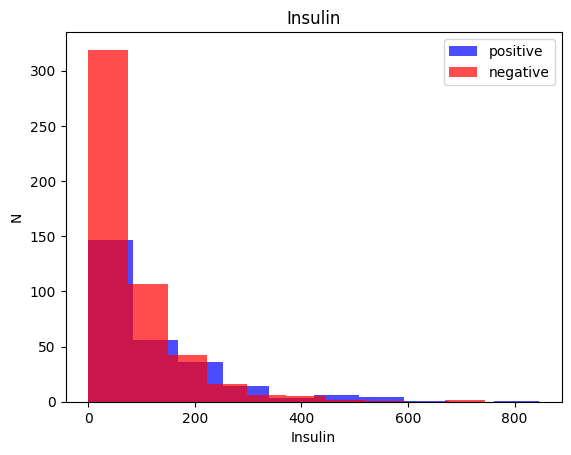

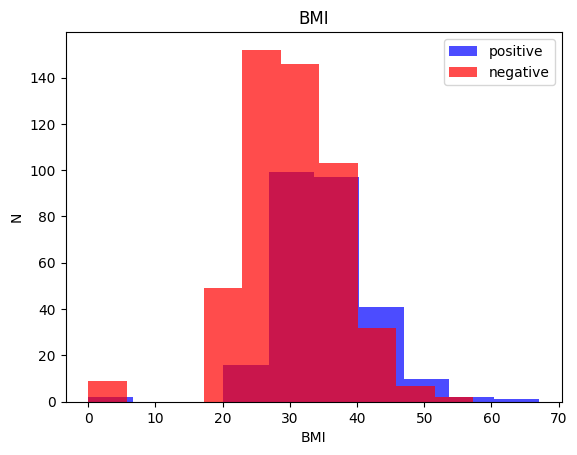

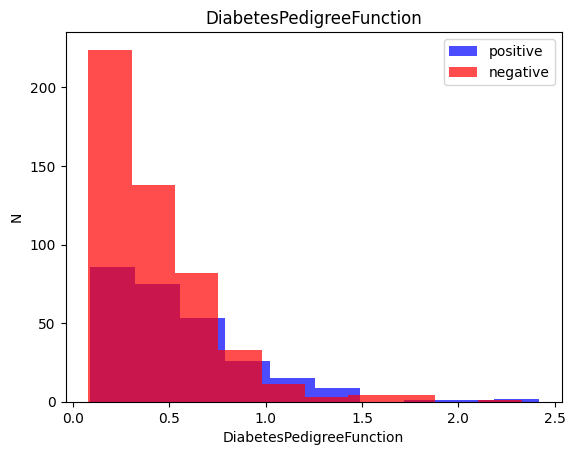

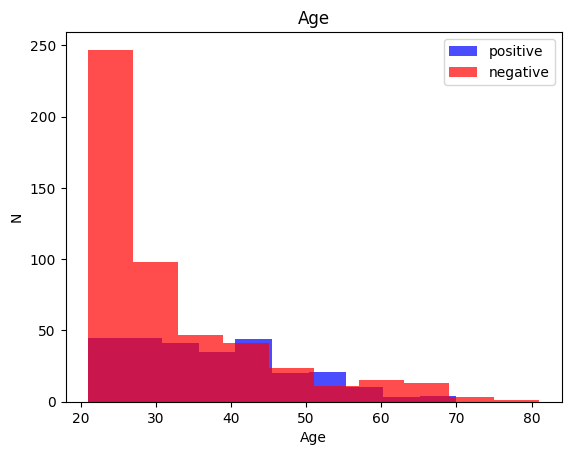

In [59]:
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(df[df['Outcome']==1][label], color = 'blue', label = 'positive', alpha = 0.7)
  plt.hist(df[df['Outcome']==0][label], color = 'red', label = 'negative', alpha = 0.7)
  plt.title(label)
  plt.ylabel('N')
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [60]:
X= df[df.columns[:-1]].values
y= df[df.columns[-1]].values

In [61]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [62]:
over = RandomOverSampler()
X,y = over.fit_resample(X,y)
data = np.hstack((X,np.reshape(y,(-1,1))))
transformed_df = pd.DataFrame(data,columns=df.columns)

In [63]:
X_train,X_temp,y_train,y_temp = train_test_split(X,y,test_size=0.4,random_state=0)
X_valid,X_test,y_valid,y_test = train_test_split(X_temp,y_temp,test_size=0.5,random_state=0)

Building our model

In [64]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [65]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [66]:
model.evaluate(X_train,y_train)

19/19 [==============================] - 0s 2ms/step - loss: 0.7105 - accuracy: 0.4767


[0.710489809513092, 0.476666659116745]

In [67]:
model.evaluate(X_valid,y_valid)

7/7 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.5150


[0.6955726742744446, 0.5149999856948853]

In [68]:
model.fit(X_train, y_train, batch_size = 16, epochs = 20, validation_data=(X_valid,y_valid))

Epoch 1/20
38/38 [==============================] - 1s 3ms/step - loss: 0.6792 - accuracy: 0.5650 - val_loss: 0.6372 - val_accuracy: 0.6850
Epoch 2/20
38/38 [==============================] - 0s 3ms/step - loss: 0.6253 - accuracy: 0.6883 - val_loss: 0.5967 - val_accuracy: 0.7450
Epoch 3/20
38/38 [==============================] - 0s 5ms/step - loss: 0.5844 - accuracy: 0.7267 - val_loss: 0.5589 - val_accuracy: 0.7700
Epoch 4/20
38/38 [==============================] - 0s 4ms/step - loss: 0.5527 - accuracy: 0.7350 - val_loss: 0.5322 - val_accuracy: 0.7700
Epoch 5/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5299 - accuracy: 0.7350 - val_loss: 0.5093 - val_accuracy: 0.7850
Epoch 6/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5148 - accuracy: 0.7400 - val_loss: 0.4932 - val_accuracy: 0.7900
Epoch 7/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5039 - accuracy: 0.7450 - val_loss: 0.4811 - val_accuracy: 0.8000
Epoch 8/20
38/38 [==

In [69]:
model.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.4870 - accuracy: 0.7750


[0.4870032072067261, 0.7749999761581421]